In [75]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import sklearn


sklearn.set_config(transform_output='pandas')

In [76]:
df = pd.read_csv("../../../../datasource/framingham.csv")

## Data Preparation
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

In [77]:
df.head(2)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.00,0,0.00,0.00,0,0,0,195.00,106.00,70.00,26.97,80.00,77.00,0
1,0,46,2.00,0,0.00,0.00,0,0,0,250.00,121.00,81.00,28.73,95.00,76.00,0


In [78]:
# Function to drop the 'education' column and rename 'male' to 'Sex_male'
def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    df.drop(columns=['education'], inplace=True, axis=1)
    df.rename(columns={'male': 'Sex_male'}, inplace=True)
    return df

In [79]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

## Handling missing values

In [80]:
# Function to drop rows with NaN values
def dropna(df: pd.DataFrame) -> pd.DataFrame:
    return df.dropna(axis=0)

In [81]:
# Define the preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('preprocess', FunctionTransformer(preprocess)),
    ('dropna', FunctionTransformer(dropna))
])

In [82]:
# Apply preprocessing
df: pd.DataFrame = preprocessing_pipeline.fit_transform(df)

In [83]:
df.head(2)

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.00,0.00,0,0,0,195.00,106.00,70.00,26.97,80.00,77.00,0
1,0,46,0,0.00,0.00,0,0,0,250.00,121.00,81.00,28.73,95.00,76.00,0


In [84]:
# Feature Selection & extraction
X = df[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']]
y = df['TenYearCHD']

In [85]:
# Define the full pipeline with normalization and logistic regression
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    # ('logreg', LogisticRegression(class_weight='balanced'))
    ('logreg', LogisticRegression())
])

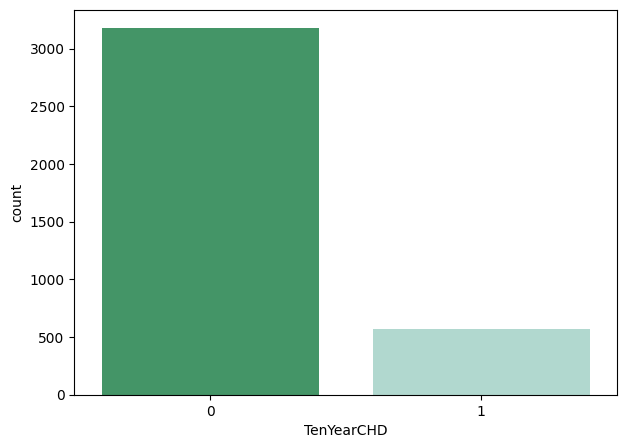

In [86]:
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=df, palette="BuGn_r", hue='TenYearCHD', legend=False)
plt.show()

In [87]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [88]:
print(f"{X_train.shape = }")
print(f"{y_train.shape = }")
print(f"{X_test.shape = }")
print(f"{y_test.shape = }")

X_train.shape = (2625, 6)
y_train.shape = (2625,)
X_test.shape = (1126, 6)
y_test.shape = (1126,)


In [89]:
y_train.value_counts()

TenYearCHD
0    2225
1     400
Name: count, dtype: int64

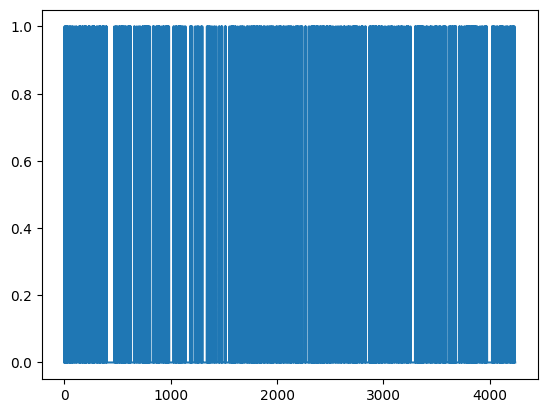

In [90]:
df['TenYearCHD'].plot()
plt.show()

In [91]:
# Train the model using pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

In [92]:
pipeline.classes_

array([0, 1], dtype=int64)

In [93]:
pipeline.feature_names_in_

array(['age', 'Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose'],
      dtype=object)

In [94]:
pipeline.n_features_in_

6

In [95]:
pipeline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('logreg', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'logreg': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logreg__C': 1.0,
 'logreg__class_weight': None,
 'logreg__dual': False,
 'logreg__fit_intercept': True,
 'logreg__intercept_scaling': 1,
 'logreg__l1_ratio': None,
 'logreg__max_iter': 100,
 'logreg__multi_class': 'deprecated',
 'logreg__n_jobs': None,
 'logreg__penalty': 'l2',
 'logreg__random_state': None,
 'logreg__solver': 'lbfgs',
 'logreg__tol': 0.0001,
 'logreg__verbose': 0,
 'logreg__warm_start': False}

In [96]:
# Make Predictions
y_pred = pipeline.predict(X_test)

In [97]:
# Evaluation
print(f"Accuracy of the model is = {accuracy_score(y_test, y_pred)}")

Accuracy of the model is = 0.8490230905861457


In [98]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [99]:
cm

array([[950,   4],
       [166,   6]], dtype=int64)

In [100]:
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

In [101]:
conf_matrix

,Predicted:0,Predicted:1
Actual:0,950,4
Actual:1,166,6


<Axes: >

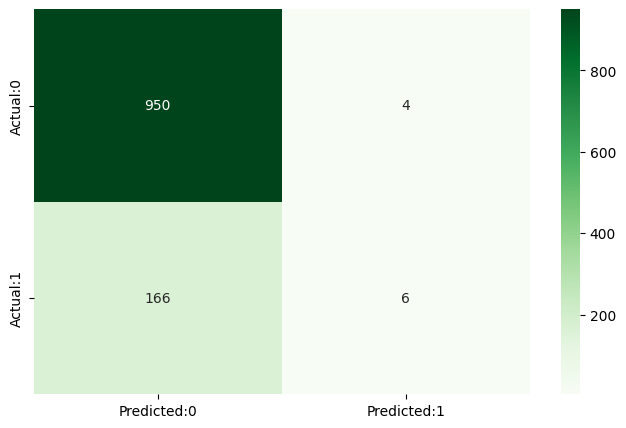

In [102]:
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')

In [103]:
print(f"The details of the confusion matrix is = {classification_report(y_test, y_pred)}")

The details of the confusion matrix is =               precision    recall  f1-score   support

           0       0.85      1.00      0.92       954
           1       0.60      0.03      0.07       172

    accuracy                           0.85      1126
   macro avg       0.73      0.52      0.49      1126
weighted avg       0.81      0.85      0.79      1126



In [104]:
from lazypredict.Supervised import LazyClassifier

In [105]:
cls = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

In [106]:
models, predictions = cls.fit(X_train, X_test, y_train, y_test)

100%|██████████| 31/31 [00:03<00:00,  9.32it/s]

[LightGBM] [Info] Number of positive: 400, number of negative: 2225
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 524
[LightGBM] [Info] Number of data points in the train set: 2625, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152381 -> initscore=-1.716048
[LightGBM] [Info] Start training from score -1.716048


In [107]:
models.sort_values(by=["Accuracy","Balanced Accuracy","ROC AUC","F1 Score"], ascending=[False, False, False, False])

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,0.85,0.53,0.53,0.79,0.02
AdaBoostClassifier,0.85,0.54,0.54,0.80,0.17
RidgeClassifier,0.85,0.51,0.51,0.78,0.03
LinearSVC,0.85,0.51,0.51,0.78,0.03
CalibratedClassifierCV,0.85,0.52,0.52,0.79,0.05
LogisticRegression,0.85,0.52,0.52,0.79,0.02
RidgeClassifierCV,0.85,0.51,0.51,0.78,0.01
PassiveAggressiveClassifier,0.85,0.53,0.53,0.79,0.03
SVC,0.85,0.51,0.51,0.78,0.32
